# **Interactive trigonometric functions**

In this notebook, we will show you how to develop an interactive notebook to demonstrate trigonometric functions. We are using the "matplotlib" package to create the main figure and widgets from "ipywidgets" as controllers.

## **1. Import all the required Python packages**

<p style="text-align: justify;font-size:15px;width: 100%"> 
    Here, we need to import all the functions from different packages. 
    "Matplotlib" is used to plot the figure. "Numpy" is for computing 
    the trigonometric function. "Ipywidgets" are needed to create the widgets.
</p>

<p style="text-align: justify;font-size:15px;width: 100%">    
    The widgets are graphical control elements, which allow the users to 
    interact with the figure. "Ipywidgets" is a Python package, which offers 
    widgets for the Jupyter notebook and JupyterLab. It has many widgets such 
    as slider, checkbox, dropdown, button, etc. In this notebook, all of the 
    widgets are from the "ipywidgets" package. Please read more at the homepage of the 
    <a href="https://ipywidgets.readthedocs.io/en/stable/index.html">"ipywidgets"</a> package.
</p>

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, Dropdown, Box, HBox, VBox, Layout, ColorPicker, Button, Text

## **2. Deploy widgets** 

<p style="text-align: justify;font-size:15px;width: 100%">
    Before development, we need to think about what functionality we want 
    to offer the users. For the trigonometric function, we want to let the user 
    select the parameters k and w in the function $sin(kx+w)$. We can use two sliders to achieve this: one for parameter k and another for parameter w. Users should also be able to choose between a sine 
    or cosine function via a dropdown menu. We also want to make it possible to change 
    the color of the plotted line. The color picker widget can help us with this 
    functionality. Finally, we can use a text box to allow for specification of the title of the plot.
    Here, we define all the widgets through use of the code shown below.
</p>

In [2]:
#Two integral sliders for the parameter k and w
k_slider = IntSlider(value=0, min=-10, max=10, description = "$k$", continuous_update=False)
w_slider = IntSlider(value=0, min=-10, max=10, description = "$w$", continuous_update=False)

#Color picker for the color of the function line
color_picker  = ColorPicker(concise=False, description='Pick a color for plot', value='red', disabled=False)

#Text box for inputting the title of the figure
title_widget = Text(value='Input title name here', description='Figure title:', disabled=False)

#Dropdown to select sine or cosine function
type_widget = Dropdown(options=(
        ("Sine function","sin"),
        ("Cosine function","cos"),  
    ), 
    description = "function type", continuous_update=False, layout=Layout(width='250px'))

## **3. Get the x, y data for plot**

<p style="text-align: justify;font-size:15px;width: 100%">
    Define a function to compute the x and y data arrays, which will be used for plotting the graphs in the figure. 
</p>

In [3]:
def get_numerical_array(k_value, w_value, function_type):
    x = np.linspace(0, 2 * np.pi, 2000)
    if function_type == "sin":
        y = np.sin(k_value*x + w_value)
    elif function_type == "cos":
        y = np.cos(k_value*x + w_value)
    return x, y      

## **4. Initalize the figure**

<p style="text-align: justify;font-size:15px;width: 100%">
    In this notebook, we used "matplotlib" for plotting the figure. 
    Please read the instructions for usage of matplotlib on the homepage of the
    <a href="https://matplotlib.org/">"matplotlib"</a> package.
</p>

In [4]:
fig, ax = plt.subplots()

#Set x, y labels of the figure
ax.set_xlabel("X")
ax.set_ylabel("Y")

#Set x, y limit of the figure
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1, 1)

#Turn on the grid for the figure
ax.grid()

#Define the function line, which allows to change the data and color later by the widgets
line, = ax.plot([], [], color = color_picker.value)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## **5. Widget events**

<p style="text-align: justify;font-size:15px;width: 100%">
    We need to connect the widgets with the plot by using so-called "widget events". 
    Here, we used the "observe" method of the widgets. To expand upon what is happening in the code below: when we 
    move the k or w slider, this action shall trigger the execution of the "callback" function "on_parameters_change". 
    Inside the "on_parameters_change" function, the x and y data arrays are recomputed using the new values  of k and w and the figure subsequently updated.
</p>

<p style="text-align: justify;font-size:15px;width: 100%">
   More information regarding widget events can be found at:
    <a href="https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html">Widget Events</a>
</p>

In [5]:
#Define callback function for the parameters changing
def on_parameters_change(change):
    x, y = get_numerical_array(k_slider.value, w_slider.value, type_widget.value)
    line.set_data(x, y)

#Define callback function for the color changing
def on_color_change(change):
    line.set_color(color_picker.value)
    
#Define callback function for the title changing
def on_title_change(change):
    ax.set_title(title_widget.value)
    
#Use observe method of the widgets
k_slider.observe(on_parameters_change, names='value', type='change')
w_slider.observe(on_parameters_change, names='value', type='change')
type_widget.observe(on_parameters_change, names='value', type='change')
color_picker.observe(on_color_change, names='value', type='change')
title_widget.observe(on_title_change, names='value', type='change')

on_parameters_change(None)

## **6. Display the widgets**

<p style="text-align: justify;font-size:15px;width: 100%"> 
    Use the "VBox" and "HBox" to arrange the layout of the widgets. 
    "VBox" arranges all widgets in one column. "HBox" arranges all widgets in one row.
</p>

<p style="text-align: justify;font-size:15px;width: 100%">
    You can read more about the layout of widgets at:
<a href="https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html">Layout and styling of Jupyter widgets</a>
</p>

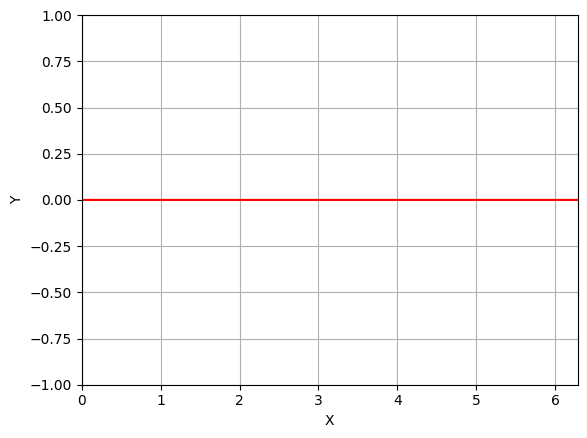

In [6]:
box1 = VBox([k_slider, w_slider, type_widget], layout=Layout(width='400px'))
box2 = VBox([color_picker, title_widget], layout=Layout(width='400px'))

display(HBox([box1, box2]))
display(fig)